# Импорт

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных

In [125]:
# Загрузим наши датафреймы
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [126]:
train_df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [127]:
train_df.shape

(600000, 15)

In [128]:
test_df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [129]:
test_df.shape

(400000, 14)

# Пояснения к столбцам

In [130]:
train_df.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

1) *'ID'*: ID пациента;

2) *'age'*: возраст;

3) *'sex'*: пол;

4) *'chest'*: тип боли в груди (от 1 до 4);

5) *'resting_blood_pressure'*: артериальное давление в состоянии покоя;

6) *'serum_cholestoral'*: уровень холестерина в крови в mg/dl;

7) *'fasting_blood_sugar'*: анализ глюкозы в крови натощак (> 120 mg/dl);

8) *'resting_electrocardiographic_results'*: результаты электрокардиографических исследований в покое (3 значения, 0-2);

9) *'maximum_heart_rate_achieved'*: максимальная частота сердечных сокращений;

10) *'exercise_induced_angina'*: стенокардия при нагрузке;

11) *'oldpeak'*: депрессия ST-сегмента;

12) *'slope'*: наклон пикового сегмента ST при физической нагрузке;

13) *'number_of_major_vessels'*: количество крупных сосудов (0-3), окрашенных с помощью флюороскопии;

14) *'thal'*: 3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект;

15) *'class'*: отсутствие (0) или наличие заболеваний сердца (1).

# Подготовка данных

In [131]:
# Проверим информацию о данных, типе данных и отсутствующих значения
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [132]:
# Список категориальных столбцов
cat_cols = ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal']

In [133]:
# Проверяем кол-во уникальных значений в категориальных столбцах

print("Категориальные столбцы:", cat_cols)
print("\n")

for i in cat_cols:
    if i in train_df.columns:
        print("Значения в столбце {0}: \n{1}".format(i, train_df[i].value_counts().sort_index()))
        print("\n")
    else:
        print(f"Столбца {i} нет в датасете.")


Категориальные столбцы: ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal']


Значения в столбце sex: 
sex
0    193532
1    406468
Name: count, dtype: int64


Значения в столбце fasting_blood_sugar: 
fasting_blood_sugar
0    509546
1     90454
Name: count, dtype: int64


Значения в столбце resting_electrocardiographic_results: 
resting_electrocardiographic_results
0    290609
1      6693
2    302698
Name: count, dtype: int64


Значения в столбце exercise_induced_angina: 
exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64


Значения в столбце slope: 
slope
1    289149
2    264082
3     46769
Name: count, dtype: int64


Значения в столбце number_of_major_vessels: 
number_of_major_vessels
0    353137
1    129017
2     73773
3     44073
Name: count, dtype: int64


Значения в столбце thal: 
thal
3    334624
6     34677
7    230699
Name: count, dtype: int64




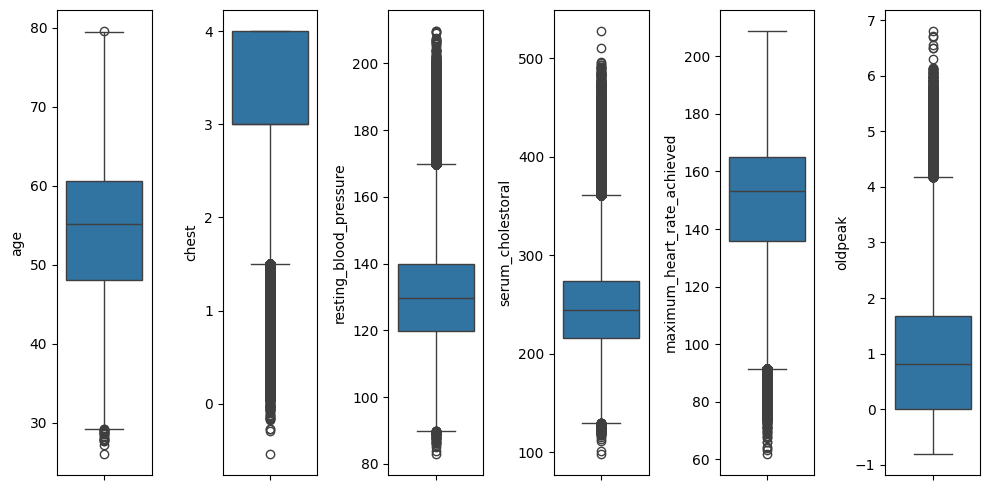

In [134]:
# Посмотрим числовые столбцы с помощью boxplots
num_cols = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']

plt.figure(figsize=(10,5))
for i in range(0,len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(y=train_df[num_cols[i]])
    plt.tight_layout()

In [135]:
# Избавимся от точек за пределами 1,5*IQR
for i in num_cols:
    Q1 = train_df[i].quantile(0.25)
    Q3 = train_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    train_df = train_df[(train_df[i] >= LowerBound)&(train_df[i] <= UpperBound)]

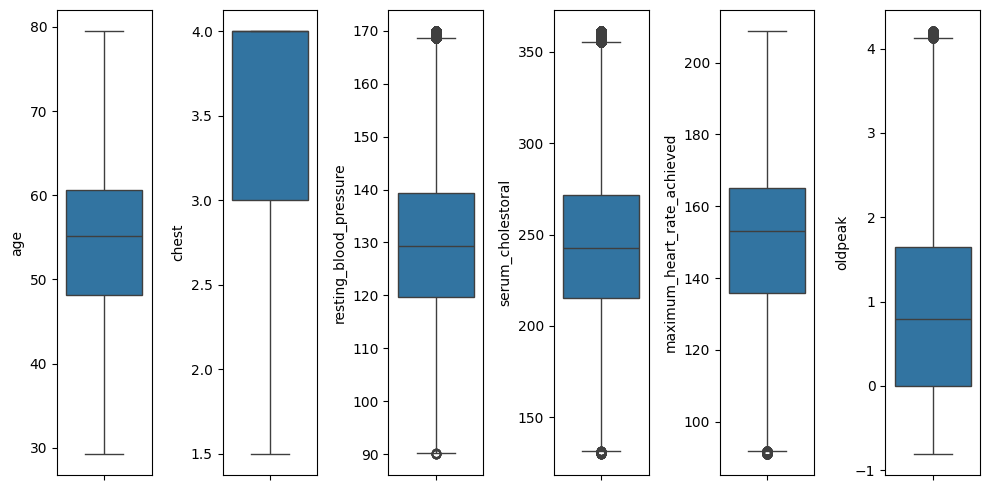

In [136]:
# Проверим выбросы после обработки
plt.figure(figsize=(10,5))
for i in range(0,len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(y = train_df[num_cols[i]])
    plt.tight_layout()

In [137]:
train_df.shape

(499427, 15)

In [138]:
# Проверим на пропущенные значения
train_df.isna().sum()

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [139]:
# Проверим на дубликаты
train_df.duplicated().sum()

0

In [141]:
# Удаляем столбец 'ID', который не несёт никакой информации
train_df = train_df.drop(['ID'], axis=1)

In [142]:
train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [143]:
train_df.shape

(499427, 14)

# EDA (Exploratory Data Analysis): разведочный анализ данных

In [144]:
# Описательная сатистика для числовых столбцов
train_df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,499427.0,54.437941,9.078599,29.250955,48.094842,55.153806,60.664042,79.504896
chest,499427.0,3.335625,0.773066,1.500001,3.000000,4.000000,4.000000,4.000000
resting_blood_pressure,499427.0,129.730042,15.863711,90.018235,119.654761,129.343936,139.249825,169.929916
serum_cholestoral,499427.0,244.015635,44.144522,129.939321,215.544744,242.555381,271.401825,361.282835
maximum_heart_rate_achieved,499427.0,149.765417,22.718461,91.021796,135.823915,153.220073,165.136636,208.735196
oldpeak,499427.0,1.006152,1.066968,-0.806788,0.000000,0.794013,1.651024,4.206401


In [145]:
# Создадим копию преобразованного датафрейма, с которой будем работать далее
df = train_df

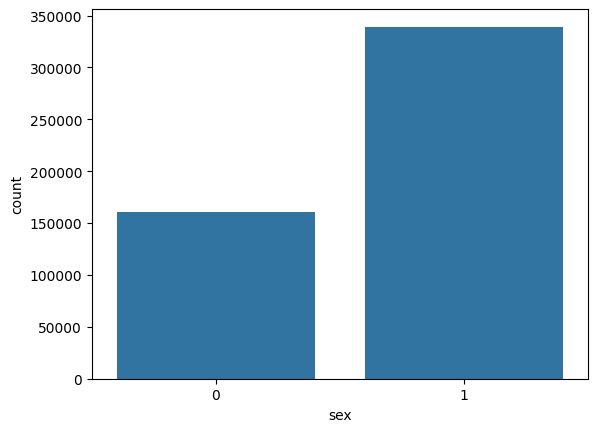

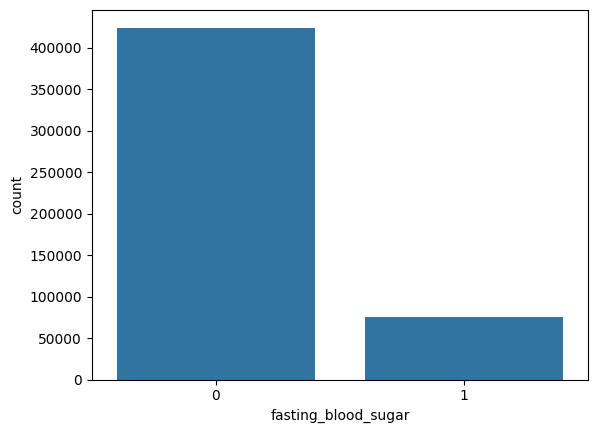

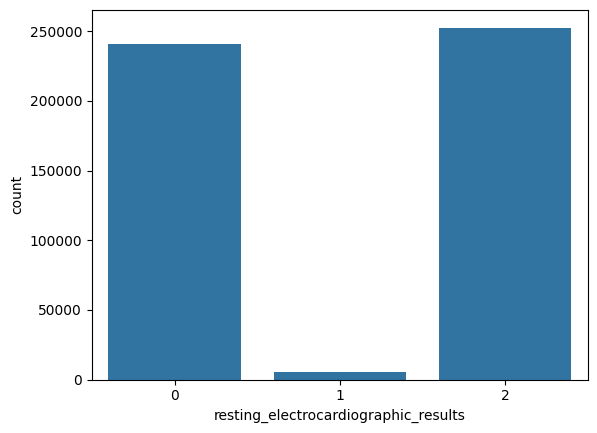

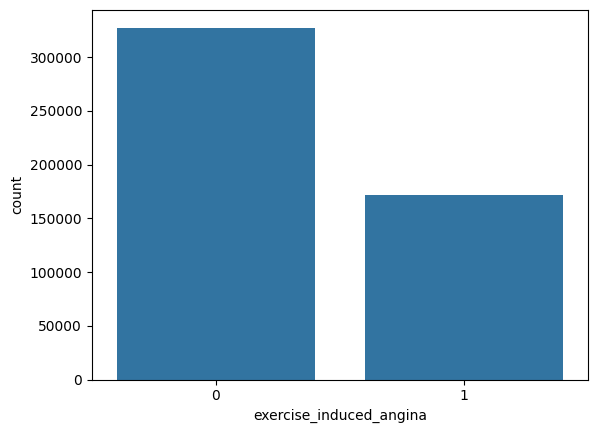

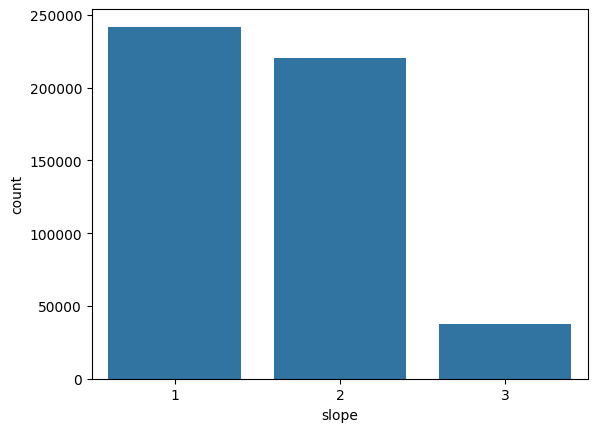

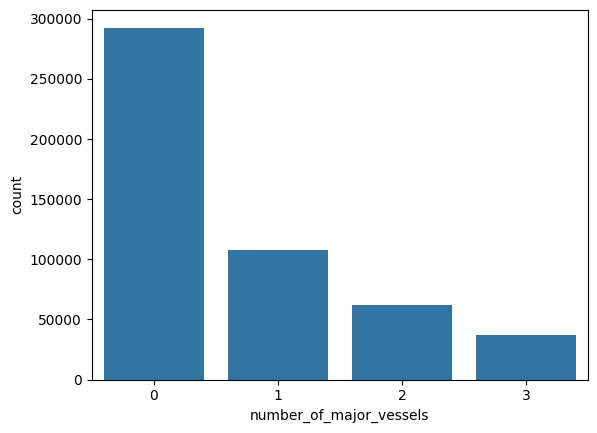

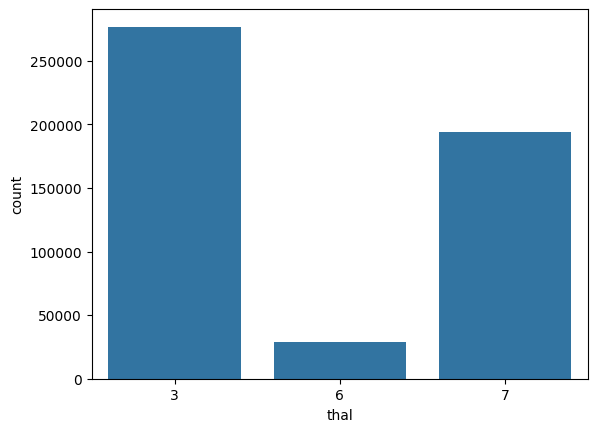

In [146]:
# Countplots для категориальных столбцов
cat_cols = ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal']
for i in cat_cols:
    sns.countplot(data=df, x = i)
    plt.show()

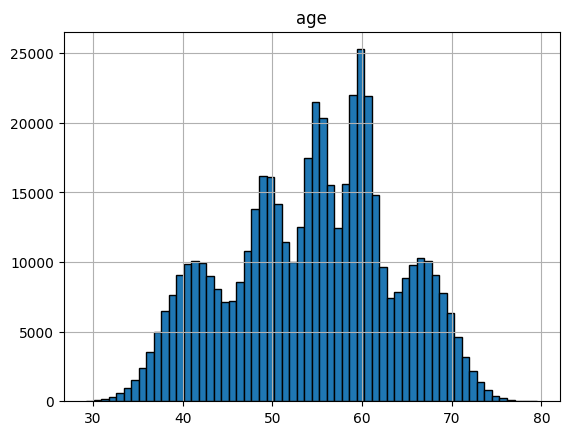

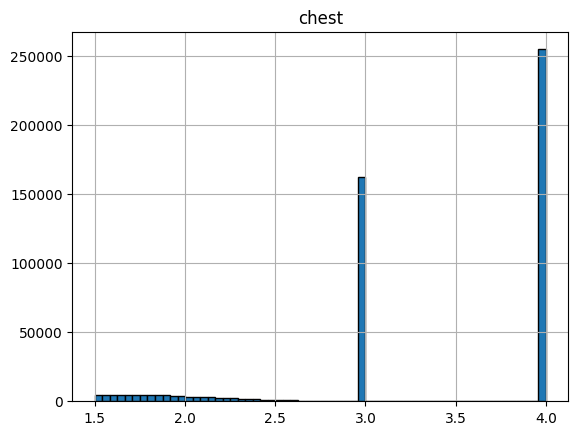

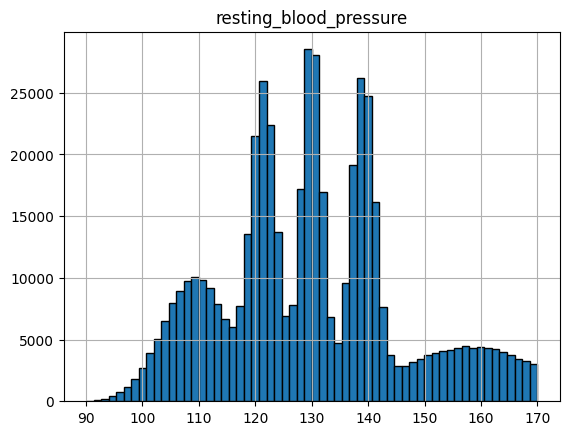

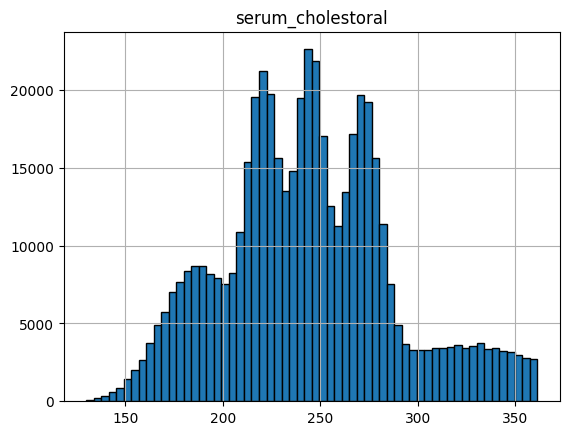

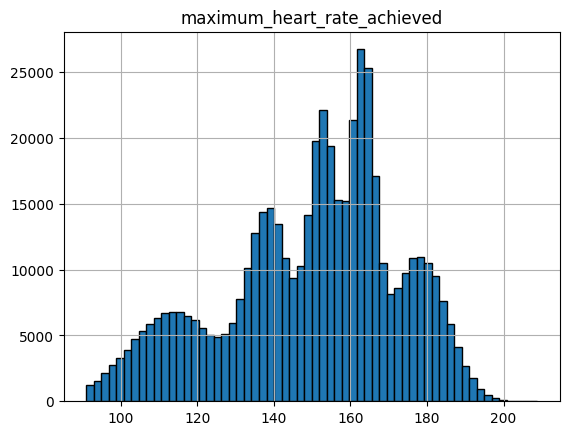

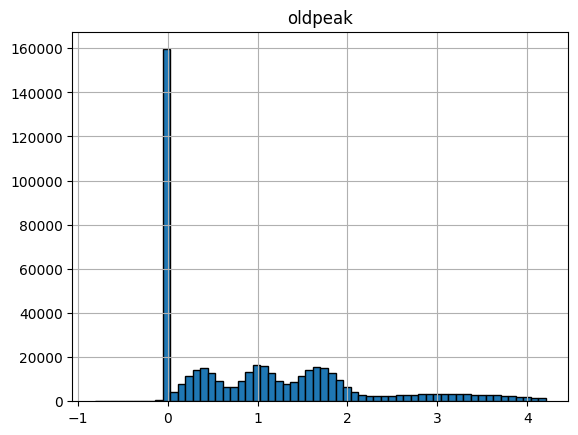

In [147]:
# Гистограммы для числовых столбцов
num_cols = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']
for i in num_cols:
    plt.hist(df[i],bins = 60, edgecolor = 'black')
    plt.title(i)
    plt.grid()
    plt.show()

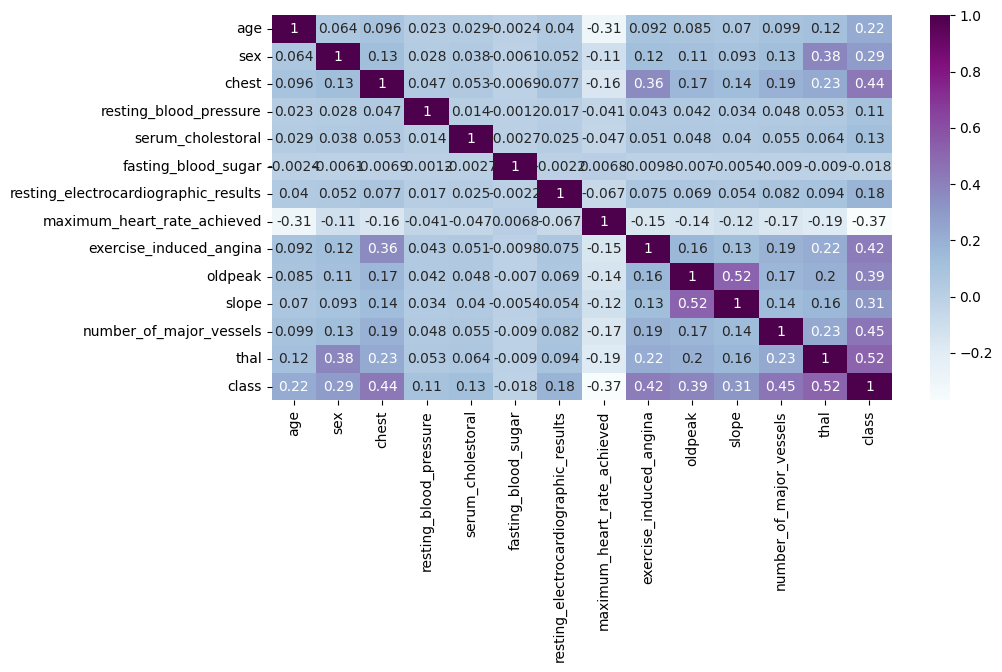

In [148]:
# Корреляционный анализ
correlation = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

В данном нам образце используется **VIF (variance inflation factor)** — это метрика, которая измеряет корреляцию и силу корреляции между объясняющими переменными в регрессионной модели.

Значение *VIF* начинается с 1 и не имеет верхнего предела.

Интерпретация значений *VIF*:

* Значение 1 указывает на отсутствие корреляции между данной объясняющей переменной и другими объясняющими переменными в модели.

* Значение между 1 и 5 указывает на умеренную корреляцию между данной объясняющей переменной и другими объясняющими переменными в модели.

* Значение больше 5 указывает на потенциально сильную корреляцию между данной объясняющей переменной и другими объясняющими переменными в модели.

In [149]:
# Импорт variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
# Создадим датафрейм для хранения значений VIF
vif_df = pd.DataFrame()
vif_df['feature'] = df.columns

In [151]:
# Рассчитаем VIF для каждого признака
vif_df['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)

In [152]:
# Отсортируем вывод данных
# В нашем примере VIF limit < 11
vif_df.sort_values(by='VIF', ascending=False)

,feature,VIF
3,resting_blood_pressure,50.399400
7,maximum_heart_rate_achieved,36.149513
0,age,30.709664
4,serum_cholestoral,28.244128
2,chest,23.515256
10,slope,10.250515
12,thal,10.109026
13,class,4.363905
1,sex,3.692416
9,oldpeak,2.815143


In [153]:
# Начнём избавляться от сильно коррелирующих переменных по одной
df.drop(columns = ['resting_blood_pressure'], inplace = True)

In [154]:
# Повторим наш анализ
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)

,feature,VIF
6,maximum_heart_rate_achieved,29.527228
0,age,26.876619
3,serum_cholestoral,26.843381
2,chest,22.800531
9,slope,10.167283
11,thal,10.049677
12,class,4.363855
1,sex,3.690699
8,oldpeak,2.814265
5,resting_electrocardiographic_results,2.119233


In [155]:
df.drop(columns = ['maximum_heart_rate_achieved'], inplace = True)

In [156]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)

,feature,VIF
0,age,25.019721
3,serum_cholestoral,22.409451
2,chest,20.504656
8,slope,9.898754
10,thal,9.849239
1,sex,3.684263
11,class,3.635483
7,oldpeak,2.810910
5,resting_electrocardiographic_results,2.111601
6,exercise_induced_angina,1.937642


In [157]:
df.drop(columns = ['age'], inplace = True)

In [158]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)

,feature,VIF
1,chest,17.771265
2,serum_cholestoral,17.030918
9,thal,9.607243
7,slope,9.572685
0,sex,3.676958
10,class,3.607144
6,oldpeak,2.806532
4,resting_electrocardiographic_results,2.102382
5,exercise_induced_angina,1.933711
8,number_of_major_vessels,1.893003


In [159]:
df.drop(columns = ['chest'], inplace = True)

In [160]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)

,feature,VIF
1,serum_cholestoral,10.576085
8,thal,9.312180
6,slope,9.187819
0,sex,3.666293
9,class,3.577014
5,oldpeak,2.801748
3,resting_electrocardiographic_results,2.091638
7,number_of_major_vessels,1.891448
4,exercise_induced_angina,1.842775
2,fasting_blood_sugar,1.172707


In [161]:
df.columns

Index(['sex', 'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'exercise_induced_angina',
       'oldpeak', 'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

Корреляция Пирсона


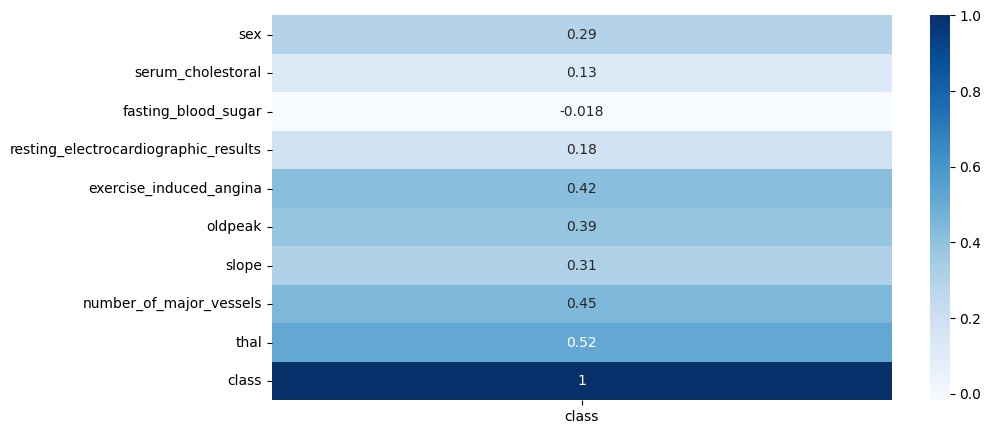

Abs corr score:
sex                                     0.293727
serum_cholestoral                       0.125394
fasting_blood_sugar                     0.017502
resting_electrocardiographic_results    0.180358
exercise_induced_angina                 0.418540
oldpeak                                 0.387564
slope                                   0.313339
number_of_major_vessels                 0.446488
thal                                    0.516150
Name: class, dtype: float64


mean 0.2998958813135795


Feature selection result:
exercise_induced_angina    0.418540
oldpeak                    0.387564
slope                      0.313339
number_of_major_vessels    0.446488
thal                       0.516150
Name: class, dtype: float64


In [162]:
# Рассчитаем корреляцию Пирсона между оставшимися признаками
print('Корреляция Пирсона')
plt.figure(figsize = (10,5))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('Abs corr score:')
print(abs(cor['class'][0:-1]))
cor['class'] = cor['class'][0:-1]
margin = abs(cor['class'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('Feature selection result:')
features = abs(cor['class'][0:-1])[abs(cor['class']) > margin]
print(features)

In [163]:
df = df.drop(columns = ['sex', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results'])

In [164]:
df.columns

Index(['exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [165]:
df.head()

,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,1,0.944547,2,0,3,1
1,0,0.119070,2,0,3,0
2,1,1.616747,2,2,7,1
3,1,0.000000,1,1,7,1
4,0,1.150464,1,1,3,0


# Разделение датафрейма на выборки

In [166]:
X = df.drop(columns=['class'])
y = df['class']

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Настройка гиперпараметров

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [170]:
model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class':['auto', 'ovr', 'multinomial'],
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_features':['sqrt', 'log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini', 'entropy']
        }
    }
    }
scores = []

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Pytho

In [173]:
# Сохраняем результаты
best_results = pd.DataFrame(scores, columns=['model','best_score','best_params'])
best_results

,model,best_score,best_params
0,Logistic_Regression,0.840139,"{'multi_class': 'multinomial', 'penalty': 'l2'..."
1,Random_Forest,0.851700,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."


# Logistic Regression

In [174]:
# Выбираем наилучшие параметры для логистической регрессии
best_results.best_params[0]

{'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

In [189]:
# Создаём модель
model = LogisticRegression(solver = 'saga',
                           penalty = 'l2',
                           multi_class = 'multinomial')
model.fit(X_train,y_train)
y_predict = model.predict(X_valid)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [190]:
# Оценка нашей модели
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('\n-- Valid data --')
accuracy = sklearn.metrics.accuracy_score(y_valid, y_predict)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_valid, y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_valid, y_predict))
print('')


-- Valid data --
Accuracy: 83.76
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     55057
           1       0.84      0.80      0.81     44829

    accuracy                           0.84     99886
   macro avg       0.84      0.83      0.84     99886
weighted avg       0.84      0.84      0.84     99886

Confusion Matrix:
[[48024  7033]
 [ 9184 35645]]



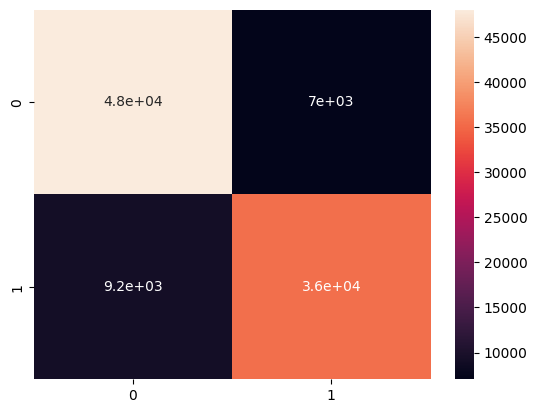

In [191]:
# Построим confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_valid, y_predict), annot = True)
plt.show()

# Random Forest

In [179]:
best_results.best_params[1]

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [192]:
model = RandomForestClassifier(criterion = 'gini',
                               max_depth = 8,
                               max_features = 'sqrt')
model.fit(X_train,y_train)
y_predict = model.predict(X_valid)

In [193]:
print('\n-- Valid data --')
accuracy = sklearn.metrics.accuracy_score(y_valid, y_predict)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_valid, y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_valid, y_predict))
print('')


-- Valid data --
Accuracy: 84.83
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     55057
           1       0.83      0.83      0.83     44829

    accuracy                           0.85     99886
   macro avg       0.85      0.85      0.85     99886
weighted avg       0.85      0.85      0.85     99886

Confusion Matrix:
[[47549  7508]
 [ 7641 37188]]



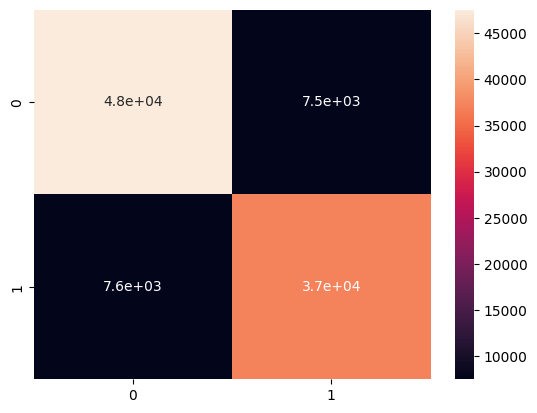

In [194]:
sns.heatmap(confusion_matrix(y_valid, y_predict), annot = True)
plt.show()

# Neural Network

In [183]:
# Импорт библиотек
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network

In [184]:
# Создание модели
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
                                             activation='relu', 
                                             solver='adam',                                  
                                             alpha=0.0001, 
                                             batch_size='auto', 
                                             learning_rate='constant', 
                                             learning_rate_init=0.001, 
                                             power_t=0.5,                                            
                                             max_iter=1000, 
                                             shuffle=True, 
                                             random_state=None, 
                                             tol=0.0001, verbose=False, 
                                             warm_start=False, 
                                             momentum=0.9, 
                                             nesterovs_momentum=True, 
                                             early_stopping=False, 
                                             validation_fraction=0.1, 
                                             beta_1=0.9, 
                                             beta_2=0.999, 
                                             epsilon=1e-08, 
                                             n_iter_no_change=10)

In [185]:
# Обучение модели на train-выборке
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [186]:
# Оценка качества
print('\n-- Training data --')
predictions = model.predict(X_train)
accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_train, predictions))
print('')


-- Training data --
Accuracy: 85.07
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86    219331
           1       0.82      0.85      0.84    180210

    accuracy                           0.85    399541
   macro avg       0.85      0.85      0.85    399541
weighted avg       0.85      0.85      0.85    399541

Confusion Matrix:
[[186060  33271]
 [ 26388 153822]]



In [187]:
# Попытка классификации на валидационной выборке
print('\n---- Valid data ----')
predictions = model.predict(X_valid)
accuracy = sklearn.metrics.accuracy_score(y_valid, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_valid, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_valid, predictions))


---- Valid data ----
Accuracy: 84.75
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     55057
           1       0.82      0.85      0.83     44829

    accuracy                           0.85     99886
   macro avg       0.85      0.85      0.85     99886
weighted avg       0.85      0.85      0.85     99886

Confusion Matrix:
[[46545  8512]
 [ 6720 38109]]


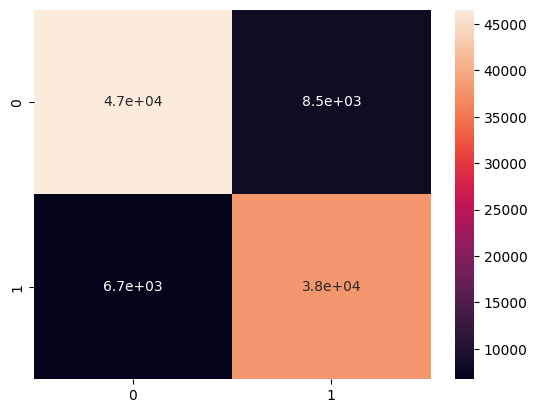

In [188]:
sns.heatmap(confusion_matrix(y_valid, predictions), annot = True)
plt.show()

# Итог

**Сравнение *Accuracy* для разных моделей:**

* Logistic Regression: 83.76
* Random Forest: 84.83
* Neural Network (MLPClassifier): 84.75